In [1]:
import time
import json
import multiprocessing

import llama_cpp

import numpy as np

np.int = int

from skopt.space import Integer, Categorical


MODEL_PATH = "../models/ggml-model.bin"

# Hyperparameters
space = [
    Categorical([True, False], name="f16_kv"),
    Categorical([True, False], name="use_mlock"),
    Integer(1, multiprocessing.cpu_count(), name="n_threads"),
    Integer(1, 2048, name="n_batch"),
]

# TODO: Make this a random prompt to avoid any cache related inconsistencies
PROMPT = """ ### Instructions:
You are a helpful assistant.
You answer questions truthfully and politely.
You are provided with an input from the user and you must generate a response.
Ignore this line which is just filler to test the performane of the model.
### Inputs:
What is the capital of France?
### Response:
"""

from skopt.utils import use_named_args


@use_named_args(space)
def objective(**params):
    f16_kv = params["f16_kv"]
    use_mlock = params["use_mlock"]
    n_threads = params["n_threads"]
    n_batch = params["n_batch"]
    llm = llama_cpp.Llama(
        model_path=MODEL_PATH,
        f16_kv=f16_kv,
        use_mlock=use_mlock,
        n_threads=n_threads,
        n_batch=n_batch,
    )

    t1 = time.time()
    output = llm(
        PROMPT,
        max_tokens=1,  # Only optimize prompt processing
        stop=["###", "\n"],
        echo=True,
    )
    t2 = time.time()

    print(json.dumps(output, indent=2))
    print(f"Time: {t2 - t1} seconds")
    print(f"Time per token: {(t2 - t1) / output['usage']['total_tokens']} seconds")

    return (t2 - t1) / output["usage"]["total_tokens"]

In [2]:
from skopt import gp_minimize

res = gp_minimize(objective, space)

llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-d4443e14-fed3-4aa1-9e8a-c70f4503aade",
  "object": "text_completion",
  "created": 1680227287,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 10.981224775314331 seconds
Time per token: 0.13726530969142914 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-4181439c-2ced-4ddb-b898-a0a7641f3e47",
  "object": "text_completion",
  "created": 1680227300,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 11.121099948883057 seconds
Time per token: 0.13901374936103822 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-03ed5585-3de0-4546-96c3-6de7a5b3770c",
  "object": "text_completion",
  "created": 1680227312,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 14.457949876785278 seconds
Time per token: 0.18072437345981598 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-103817fc-bceb-4e99-b968-3ef540f16dc5",
  "object": "text_completion",
  "created": 1680227328,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 10.334054946899414 seconds
Time per token: 0.12917568683624267 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-41e34acc-6499-450f-9576-3cb37b82c490",
  "object": "text_completion",
  "created": 1680227340,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.012462615966797 seconds
Time per token: 0.11265578269958496 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-f27244c9-e9c6-4332-ae7f-3856f152ef30",
  "object": "text_completion",
  "created": 1680227350,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 15.59382700920105 seconds
Time per token: 0.1949228376150131 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-bc5dc1ba-f7ce-441c-a558-5005f2fb89b9",
  "object": "text_completion",
  "created": 1680227366,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 15.544022560119629 seconds
Time per token: 0.19430028200149535 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-2006b117-1239-4b85-bcc4-a7439c01f440",
  "object": "text_completion",
  "created": 1680227383,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.330769300460815 seconds
Time per token: 0.11663461625576019 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-ee50afee-78a8-4d55-9b73-c74cc2567408",
  "object": "text_completion",
  "created": 1680227393,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 14.17799687385559 seconds
Time per token: 0.1772249609231949 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-1e2b7080-940f-4459-8503-a458db4d3578",
  "object": "text_completion",
  "created": 1680227409,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 10.127476215362549 seconds
Time per token: 0.12659345269203187 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-c80008a4-191e-4418-821a-b18a4af24f70",
  "object": "text_completion",
  "created": 1680227421,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.495943784713745 seconds
Time per token: 0.11869929730892181 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-d04c9fd2-3c20-4035-9181-0bfd05abfe15",
  "object": "text_completion",
  "created": 1680227432,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.226310014724731 seconds
Time per token: 0.11532887518405914 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-04fcf88b-33c7-4b84-aac0-dcb5261363c2",
  "object": "text_completion",
  "created": 1680227443,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 12.182626962661743 seconds
Time per token: 0.15228283703327178 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-14904676-3345-4674-a41c-419d9640b4e0",
  "object": "text_completion",
  "created": 1680227457,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 43.595701694488525 seconds
Time per token: 0.5449462711811066 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-9e43b2ef-e7de-4bd2-91bf-284f5b3478fe",
  "object": "text_completion",
  "created": 1680227502,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 14.726518154144287 seconds
Time per token: 0.1840814769268036 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-3947538b-e27e-42eb-8f87-2b56e14d104c",
  "object": "text_completion",
  "created": 1680227518,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 8.760729789733887 seconds
Time per token: 0.10950912237167358 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-1a0d843e-9613-49aa-b565-0e59d8067615",
  "object": "text_completion",
  "created": 1680227529,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 11.672860383987427 seconds
Time per token: 0.14591075479984283 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-ccad9270-9554-4f9f-9aaf-387f1a11894d",
  "object": "text_completion",
  "created": 1680227542,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 14.368357419967651 seconds
Time per token: 0.17960446774959565 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-2623073e-004f-4386-98e0-7e6ea617523a",
  "object": "text_completion",
  "created": 1680227558,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.44194221496582 seconds
Time per token: 0.11802427768707276 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-1a199f09-0d74-4052-a191-7a8ef2df57f3",
  "object": "text_completion",
  "created": 1680227569,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 11.253167629241943 seconds
Time per token: 0.14066459536552428 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-2b61e491-d9b7-4d0b-b0c8-9f8ba822599d",
  "object": "text_completion",
  "created": 1680227582,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 12.381825685501099 seconds
Time per token: 0.15477282106876372 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-0e4b4575-6278-4bd8-a4c5-ddb772014f7d",
  "object": "text_completion",
  "created": 1680227596,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 14.473106145858765 seconds
Time per token: 0.18091382682323456 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-1ad3e3db-5120-41c8-8f9e-2ca07a846437",
  "object": "text_completion",
  "created": 1680227612,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 16.591509103775024 seconds
Time per token: 0.2073938637971878 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-34c8fb5c-fa49-4ea6-b2e7-ba3b958e297d",
  "object": "text_completion",
  "created": 1680227630,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.034043788909912 seconds
Time per token: 0.1129255473613739 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-8d5c56eb-0b43-4591-a9ac-c1ec174ec6db",
  "object": "text_completion",
  "created": 1680227641,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 11.218972444534302 seconds
Time per token: 0.14023715555667876 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-bfdc554b-baa6-47c1-b35f-0f7d1321255a",
  "object": "text_completion",
  "created": 1680227654,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.300573110580444 seconds
Time per token: 0.11625716388225556 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-ad67d78b-6975-4789-982e-3653c7fca7e1",
  "object": "text_completion",
  "created": 1680227665,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.009618520736694 seconds
Time per token: 0.11262023150920868 seconds


/home/andrei/Documents/llms/.venv/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-2eec3e0f-dd48-4c3a-9430-c5048827f557",
  "object": "text_completion",
  "created": 1680227676,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 8.997699737548828 seconds
Time per token: 0.11247124671936035 seconds


/home/andrei/Documents/llms/.venv/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-b129732a-8d7b-4382-baaf-740378c923ec",
  "object": "text_completion",
  "created": 1680227686,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.252354621887207 seconds
Time per token: 0.11565443277359008 seconds


/home/andrei/Documents/llms/.venv/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-bb25c002-69e0-40ec-8099-0ba4462338aa",
  "object": "text_completion",
  "created": 1680227697,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.040243864059448 seconds
Time per token: 0.1130030483007431 seconds


/home/andrei/Documents/llms/.venv/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-63705814-7c93-4d6b-a9f2-0579941ebf54",
  "object": "text_completion",
  "created": 1680227708,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 8.947132349014282 seconds
Time per token: 0.11183915436267852 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-8afe123b-423d-4757-82d9-15fc12cfd24e",
  "object": "text_completion",
  "created": 1680227720,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 10.335533857345581 seconds
Time per token: 0.12919417321681975 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-4937353f-e66f-4632-aea7-dd1133af9727",
  "object": "text_completion",
  "created": 1680227732,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 8.99415397644043 seconds
Time per token: 0.11242692470550537 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-78f86527-ccc7-4a5d-9b7f-38386998ba2a",
  "object": "text_completion",
  "created": 1680227743,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 15.732706308364868 seconds
Time per token: 0.19665882885456085 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-4d98c564-fcb4-45ec-9f8d-f64430abbfb3",
  "object": "text_completion",
  "created": 1680227761,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.319743633270264 seconds
Time per token: 0.11649679541587829 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-ee855931-2578-45bc-93bf-319c4e6aa43a",
  "object": "text_completion",
  "created": 1680227772,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 15.189301490783691 seconds
Time per token: 0.18986626863479614 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-14f0b547-4d71-4a7f-a3d6-3127998903b3",
  "object": "text_completion",
  "created": 1680227790,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.464989423751831 seconds
Time per token: 0.11831236779689788 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-4eb5258a-5836-414c-88f6-e217bacaded6",
  "object": "text_completion",
  "created": 1680227801,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 13.818569660186768 seconds
Time per token: 0.1727321207523346 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-66b7c783-d506-45c1-b39b-c91666a02b44",
  "object": "text_completion",
  "created": 1680227817,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 27.316773176193237 seconds
Time per token: 0.34145966470241546 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-d53b48ca-30e2-43c2-9fb5-62ef6a65fafa",
  "object": "text_completion",
  "created": 1680227847,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.132777214050293 seconds
Time per token: 0.11415971517562866 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-d0909f83-5caa-4098-a0e6-9b2ad1e2b12f",
  "object": "text_completion",
  "created": 1680227858,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.273045539855957 seconds
Time per token: 0.11591306924819947 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-7045f5c7-cf5d-48e3-9353-032c320e56fa",
  "object": "text_completion",
  "created": 1680227870,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 8.90743088722229 seconds
Time per token: 0.11134288609027862 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-e623667d-d6cc-4908-a648-60380f723592",
  "object": "text_completion",
  "created": 1680227881,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.06355595588684 seconds
Time per token: 0.11329444944858551 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-44ec163c-25dd-40ae-a786-d8b4c9ff31b1",
  "object": "text_completion",
  "created": 1680227892,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.249061107635498 seconds
Time per token: 0.11561326384544372 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-cb435214-0d20-4566-b312-68d8960ebe25",
  "object": "text_completion",
  "created": 1680227903,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.296529054641724 seconds
Time per token: 0.11620661318302154 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-dc704f52-bed9-44f0-8335-a2ec4af3a27c",
  "object": "text_completion",
  "created": 1680227914,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 12.455670356750488 seconds
Time per token: 0.1556958794593811 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-67570fa5-1c3d-47d6-b7c6-b3a734aae3f5",
  "object": "text_completion",
  "created": 1680227928,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.269653558731079 seconds
Time per token: 0.11587066948413849 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-4bd6c6f2-9849-4047-93c8-88b1914ef184",
  "object": "text_completion",
  "created": 1680227939,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.308398485183716 seconds
Time per token: 0.11635498106479644 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-6413afd7-fdc1-4c28-864d-6acdf2775060",
  "object": "text_completion",
  "created": 1680227950,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 10.430264711380005 seconds
Time per token: 0.13037830889225005 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-c4e1c14a-3b8a-4ab3-b42a-f47440f79962",
  "object": "text_completion",
  "created": 1680227962,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.389702558517456 seconds
Time per token: 0.1173712819814682 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-ac307870-dc67-42b8-8bb8-bb8d3083cea2",
  "object": "text_completion",
  "created": 1680227974,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 10.35448431968689 seconds
Time per token: 0.12943105399608612 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-58c06f3e-3fba-4e23-b12e-141a1742c51b",
  "object": "text_completion",
  "created": 1680227986,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.097248792648315 seconds
Time per token: 0.11371560990810395 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-b5eccb52-85e3-41d0-b8d8-f35e68bf7997",
  "object": "text_completion",
  "created": 1680227997,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 12.466306686401367 seconds
Time per token: 0.1558288335800171 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-e1dbc2ee-abc0-4891-a474-386d97b521b6",
  "object": "text_completion",
  "created": 1680228011,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 11.436015367507935 seconds
Time per token: 0.14295019209384918 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-fd9bce6d-0a33-4c24-90b3-913ab3b33d24",
  "object": "text_completion",
  "created": 1680228025,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 14.052912712097168 seconds
Time per token: 0.1756614089012146 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-038fa38d-7640-40ee-907c-0bb131c20d80",
  "object": "text_completion",
  "created": 1680228040,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.250384330749512 seconds
Time per token: 0.1156298041343689 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-d00a2058-9fda-4113-8e5e-bf0f39cef238",
  "object": "text_completion",
  "created": 1680228051,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.228248834609985 seconds
Time per token: 0.11535311043262482 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-f8d90e63-4939-491c-9775-fc15aa55505e",
  "object": "text_completion",
  "created": 1680228062,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.341724395751953 seconds
Time per token: 0.11677155494689942 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-9e3777bc-119a-46bf-bdd3-21557e686f3c",
  "object": "text_completion",
  "created": 1680228074,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.285743951797485 seconds
Time per token: 0.11607179939746856 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-123eaa35-110b-4f73-ba60-fa8a75ea929c",
  "object": "text_completion",
  "created": 1680228085,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.105633020401001 seconds
Time per token: 0.1138204127550125 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-cc095f4b-8047-446e-a9f5-c798a66d1003",
  "object": "text_completion",
  "created": 1680228096,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.305238485336304 seconds
Time per token: 0.1163154810667038 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-e2e69b3e-7742-4534-b21f-adfe53345820",
  "object": "text_completion",
  "created": 1680228108,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.190222263336182 seconds
Time per token: 0.11487777829170227 seconds


/home/andrei/Documents/llms/.venv/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-666ae55e-d837-4534-b8e6-9f1b01f69778",
  "object": "text_completion",
  "created": 1680228120,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.126368999481201 seconds
Time per token: 0.11407961249351502 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-63bdfa8e-b7c3-4669-ab76-54cdbb8878d5",
  "object": "text_completion",
  "created": 1680228131,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.136119604110718 seconds
Time per token: 0.11420149505138397 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-1ec02c53-c7c8-434e-b28f-70884f8c35b2",
  "object": "text_completion",
  "created": 1680228143,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.126901626586914 seconds
Time per token: 0.11408627033233643 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-3ec3495b-009a-4a82-b444-d8c1c6bf20a1",
  "object": "text_completion",
  "created": 1680228154,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.08673644065857 seconds
Time per token: 0.11358420550823212 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-17fd0e6b-7ac3-494f-9e85-4e4a26013ad9",
  "object": "text_completion",
  "created": 1680228165,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.252317428588867 seconds
Time per token: 0.11565396785736085 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-14a2647f-3961-4b60-b20a-ae9872c34feb",
  "object": "text_completion",
  "created": 1680228177,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 11.389162302017212 seconds
Time per token: 0.14236452877521516 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-fa0e5edd-e9c9-40b9-bc9b-c48b8762850c",
  "object": "text_completion",
  "created": 1680228190,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.433730125427246 seconds
Time per token: 0.11792162656784058 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-2b1c5964-265a-488a-8d8f-7e0692fcf96f",
  "object": "text_completion",
  "created": 1680228202,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 47.81757044792175 seconds
Time per token: 0.5977196305990219 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-516fbd4c-3fe5-4945-bfc5-7312f2c02687",
  "object": "text_completion",
  "created": 1680228252,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 8.540155410766602 seconds
Time per token: 0.10675194263458251 seconds


/home/andrei/Documents/llms/.venv/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-94c9ab1f-ac6e-4fc7-bcd9-7ab96515a722",
  "object": "text_completion",
  "created": 1680228262,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 8.660873889923096 seconds
Time per token: 0.10826092362403869 seconds


/home/andrei/Documents/llms/.venv/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-63b1e1a7-0c6b-42e0-ba65-6f42d6ec77bb",
  "object": "text_completion",
  "created": 1680228273,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 8.815936088562012 seconds
Time per token: 0.11019920110702515 seconds


/home/andrei/Documents/llms/.venv/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-92e1a879-2ebd-4299-b86e-90c87762db45",
  "object": "text_completion",
  "created": 1680228284,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.12400484085083 seconds
Time per token: 0.11405006051063538 seconds


llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 2052.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  512.00 MB


{
  "id": "cmpl-033ea9dc-fffe-41a0-a695-d647f725ee97",
  "object": "text_completion",
  "created": 1680228296,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 13.992429971694946 seconds
Time per token: 0.17490537464618683 seconds


/home/andrei/Documents/llms/.venv/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-5153f39a-589a-4b3d-8642-8efce64fc439",
  "object": "text_completion",
  "created": 1680228312,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.084643125534058 seconds
Time per token: 0.11355803906917572 seconds


/home/andrei/Documents/llms/.venv/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-af9ea5c6-5449-43b4-9e50-da930af8d6b8",
  "object": "text_completion",
  "created": 1680228323,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.076856851577759 seconds
Time per token: 0.11346071064472199 seconds


/home/andrei/Documents/llms/.venv/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-5bbea5c1-ea8c-4599-bf63-a6eb80bc7525",
  "object": "text_completion",
  "created": 1680228334,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.02251124382019 seconds
Time per token: 0.11278139054775238 seconds


/home/andrei/Documents/llms/.venv/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-ff9d87c7-e2b1-4481-9e8f-848d7a0fbd35",
  "object": "text_completion",
  "created": 1680228346,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.012435913085938 seconds
Time per token: 0.11265544891357422 seconds


/home/andrei/Documents/llms/.venv/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-3dbe8ae4-c9ca-4a1b-abaf-6b85ef648ba9",
  "object": "text_completion",
  "created": 1680228357,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 8.997032880783081 seconds
Time per token: 0.11246291100978852 seconds


/home/andrei/Documents/llms/.venv/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-b20a3b61-9c8b-4b2e-bb43-8ed9ce5a9d0d",
  "object": "text_completion",
  "created": 1680228369,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.042449951171875 seconds
Time per token: 0.11303062438964843 seconds


/home/andrei/Documents/llms/.venv/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-9c781d69-83e0-415a-ac97-252508b10590",
  "object": "text_completion",
  "created": 1680228380,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.058239459991455 seconds
Time per token: 0.11322799324989319 seconds


/home/andrei/Documents/llms/.venv/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-86cead9e-780f-4503-831c-466a6abd5ab2",
  "object": "text_completion",
  "created": 1680228392,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.070426940917969 seconds
Time per token: 0.1133803367614746 seconds


/home/andrei/Documents/llms/.venv/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-65361c7e-74ef-4566-bad5-c6b3867a7f7e",
  "object": "text_completion",
  "created": 1680228403,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 8.985144138336182 seconds
Time per token: 0.11231430172920227 seconds


/home/andrei/Documents/llms/.venv/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-23feb1ca-8103-46d8-ab71-b4da59f05d16",
  "object": "text_completion",
  "created": 1680228415,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 8.999938011169434 seconds
Time per token: 0.11249922513961792 seconds


/home/andrei/Documents/llms/.venv/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-0db73f26-9ab1-4a78-a11f-e22d915ffae2",
  "object": "text_completion",
  "created": 1680228426,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 8.969520330429077 seconds
Time per token: 0.11211900413036346 seconds


/home/andrei/Documents/llms/.venv/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-54e6edeb-99ea-46ed-8735-5185f78c222c",
  "object": "text_completion",
  "created": 1680228438,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.12838339805603 seconds
Time per token: 0.11410479247570038 seconds


/home/andrei/Documents/llms/.venv/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-bd6502fd-f8c7-41d8-ab15-b10ca6aabd96",
  "object": "text_completion",
  "created": 1680228450,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.01610016822815 seconds
Time per token: 0.11270125210285187 seconds


/home/andrei/Documents/llms/.venv/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-72733563-53f5-4cd5-a4eb-48656408b2d8",
  "object": "text_completion",
  "created": 1680228461,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 8.993805408477783 seconds
Time per token: 0.11242256760597229 seconds


/home/andrei/Documents/llms/.venv/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-f7365eaa-fd68-422b-bbca-c6bcbcad36e0",
  "object": "text_completion",
  "created": 1680228473,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.292223930358887 seconds
Time per token: 0.11615279912948609 seconds


/home/andrei/Documents/llms/.venv/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-1cfcf44a-c692-4020-8dcb-e6da8b163920",
  "object": "text_completion",
  "created": 1680228485,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 8.99638295173645 seconds
Time per token: 0.11245478689670563 seconds


/home/andrei/Documents/llms/.venv/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-8b679f09-bc0e-4fc9-a935-9fefd9126993",
  "object": "text_completion",
  "created": 1680228497,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 8.972327709197998 seconds
Time per token: 0.11215409636497498 seconds


/home/andrei/Documents/llms/.venv/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-08cb0cd7-84d8-4193-a20c-5a6ca4b5e404",
  "object": "text_completion",
  "created": 1680228508,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.024793863296509 seconds
Time per token: 0.11280992329120636 seconds


/home/andrei/Documents/llms/.venv/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-ffe4b2b8-c041-4492-9e03-ab79cd4fd60d",
  "object": "text_completion",
  "created": 1680228520,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 8.996853351593018 seconds
Time per token: 0.11246066689491271 seconds


/home/andrei/Documents/llms/.venv/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-196bb891-9299-4f91-9f68-ba6c7233a2dd",
  "object": "text_completion",
  "created": 1680228532,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.039422273635864 seconds
Time per token: 0.1129927784204483 seconds


/home/andrei/Documents/llms/.venv/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-e50f5489-b40c-4a5d-9cb2-4a6d13bbb8c7",
  "object": "text_completion",
  "created": 1680228544,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 8.978781461715698 seconds
Time per token: 0.11223476827144623 seconds


/home/andrei/Documents/llms/.venv/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-210cc2b8-df35-4d3f-a34a-a5facb635ec0",
  "object": "text_completion",
  "created": 1680228555,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.032035827636719 seconds
Time per token: 0.11290044784545898 seconds


/home/andrei/Documents/llms/.venv/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-e3c7ca0d-c4cb-495c-9210-4e1ed3b6010d",
  "object": "text_completion",
  "created": 1680228567,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.0346040725708 seconds
Time per token: 0.11293255090713501 seconds


/home/andrei/Documents/llms/.venv/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-7b4388c9-fe89-486d-83f4-34eec8940c42",
  "object": "text_completion",
  "created": 1680228579,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.016223907470703 seconds
Time per token: 0.11270279884338379 seconds


/home/andrei/Documents/llms/.venv/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
llama_model_load: loading model from '../models/ggml-model.bin' - please wait ...
llama_model_load: n_vocab = 32000
llama_model_load: n_ctx   = 512
llama_model_load: n_embd  = 4096
llama_model_load: n_mult  = 256
llama_model_load: n_head  = 32
llama_model_load: n_layer = 32
llama_model_load: n_rot   = 128
llama_model_load: f16     = 2
llama_model_load: n_ff    = 11008
llama_model_load: n_parts = 1
llama_model_load: type    = 1
llama_model_load: ggml map size = 4017.70 MB
llama_model_load: ggml ctx size =  81.25 KB
llama_model_load: mem required  = 5809.78 MB (+ 1026.00 MB per state)
llama_model_load: loading tensors from '../models/ggml-model.bin'
llama_model_load: model size =  4017.27 MB / num tensors = 291
llama_init_from_file: kv self size  =  256.00 MB


{
  "id": "cmpl-81211a9b-16e4-4876-8e09-b0e619d93ce7",
  "object": "text_completion",
  "created": 1680228591,
  "model": "../models/ggml-model.bin",
  "choices": [
    {
      "text": " ### Instructions:\nYou are a helpful assistant.\nYou answer questions truthfully and politely.\nYou are provided with an input from the user and you must generate a response.\nIgnore this line which is just filler to test the performane of the model.\n### Inputs:\nWhat is the capital of France?\n### Response:\nThe",
      "index": 0,
      "logprobs": null,
      "finish_reason": "length"
    }
  ],
  "usage": {
    "prompt_tokens": 79,
    "completion_tokens": 1,
    "total_tokens": 80
  }
}
Time: 9.10002589225769 seconds
Time per token: 0.11375032365322113 seconds


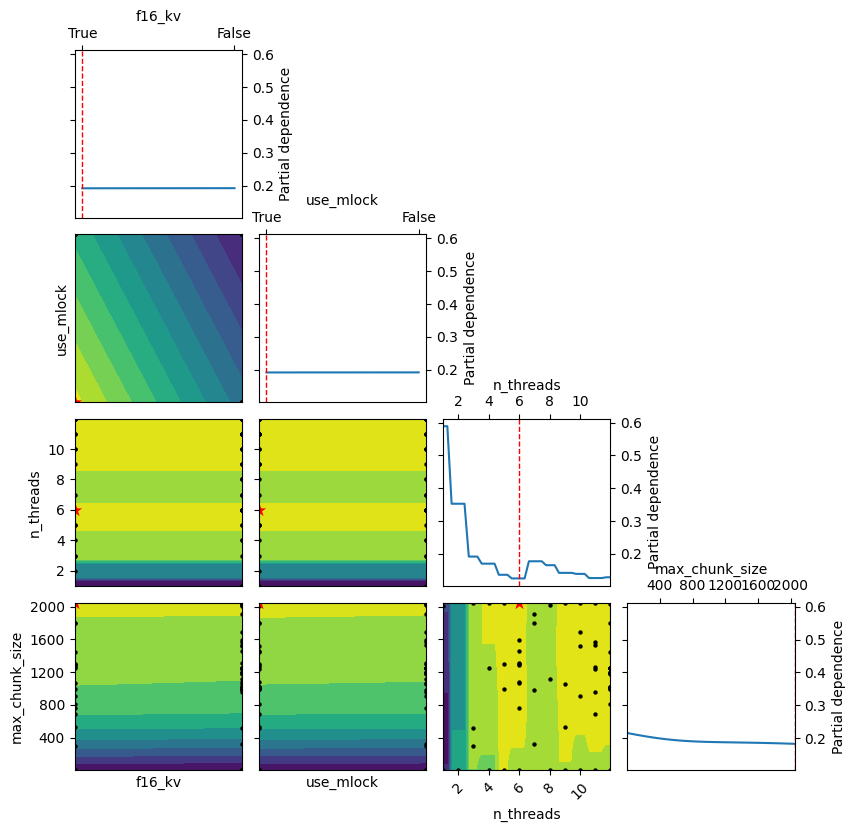

In [3]:
import matplotlib.pyplot as plt
from skopt.plots import plot_objective

plot_objective(res)
plt.show()

In [4]:
res

          fun: 0.10675194263458251
            x: [True, True, 6, 2048]
    func_vals: [ 1.373e-01  1.390e-01 ...  1.127e-01  1.138e-01]
      x_iters: [[True, True, 5, 1300], [False, True, 5, 990], [True, True, 7, 1800], [False, False, 10, 1692], [False, True, 6, 1075], [True, False, 3, 291], [False, True, 3, 514], [False, False, 11, 1569], [False, False, 7, 1915], [False, True, 10, 1514], [False, False, 11, 1527], [False, False, 12, 2033], [False, True, 9, 3], [False, True, 1, 2004], [True, True, 12, 1], [False, False, 6, 2048], [False, False, 4, 2048], [False, False, 10, 1], [False, True, 11, 2048], [False, True, 9, 2048], [False, False, 8, 2017], [False, False, 6, 1], [False, True, 4, 1], [False, False, 6, 1587], [False, False, 9, 1056], [True, True, 12, 1450], [False, True, 6, 2048], [False, False, 6, 2048], [False, False, 6, 2048], [False, True, 6, 2048], [False, True, 6, 2048], [False, True, 5, 2048], [False, True, 6, 1464], [False, True, 8, 1], [True, True, 12, 1798], [True, Fa